In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [135]:
# Import the data
df = pd.read_csv("C:/Users/z011348/Desktop/ML/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [136]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

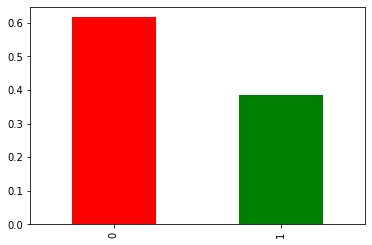

In [137]:
# Insights
# few plots to understand the data well
# Survival bar
df.Survived.value_counts(normalize=True).plot(kind='bar', color=['red', 'green']);


In [90]:
df.Cabin.isna().sum()

687

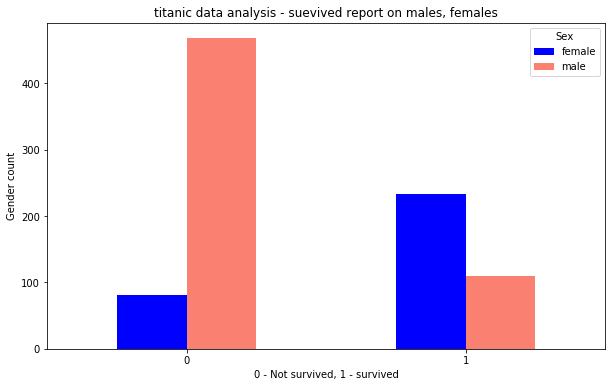

In [138]:
# plot to check who will survive and who is not (male and female)
pd.crosstab(df.Survived, df.Sex).plot(kind='bar',
                                     figsize=(10,6),
                                     color=['blue', 'salmon'])
plt.title("titanic data analysis - suevived report on males, females")
plt.xlabel("0 - Not survived, 1 - survived")
plt.ylabel("Gender count")
plt.xticks(rotation=0);

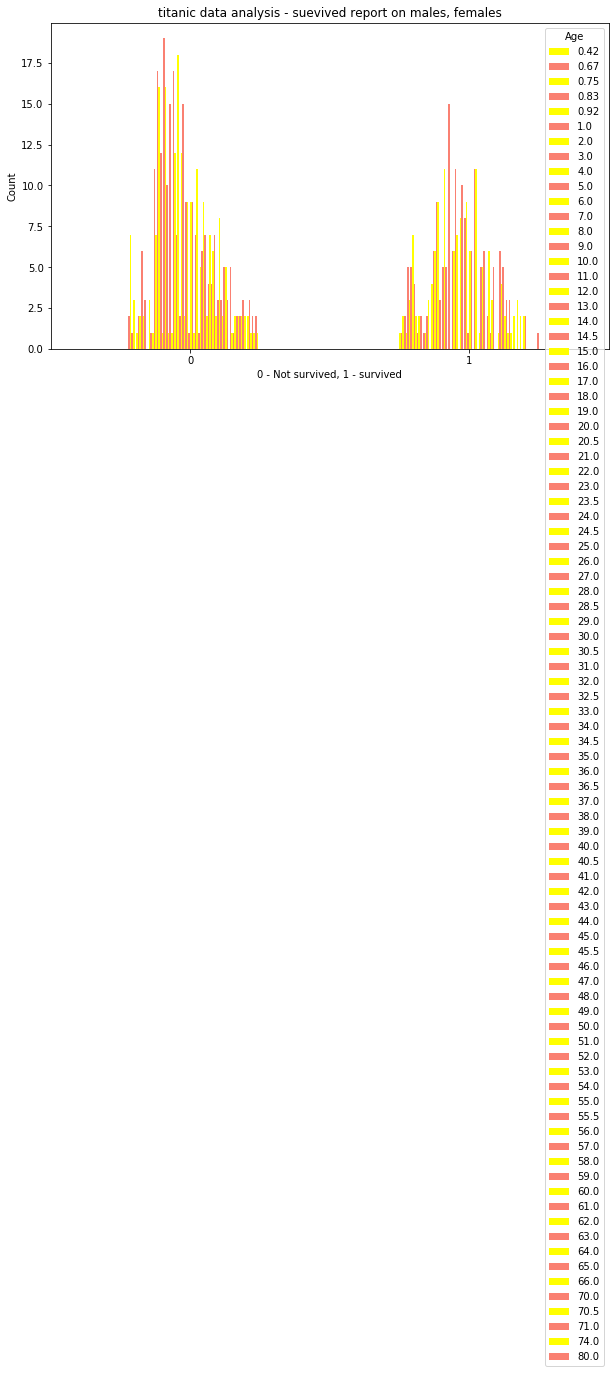

In [139]:
pd.crosstab(df.Survived, df.Age).plot(kind='bar',
                                     figsize=(10,6),
                                     color=['yellow', 'salmon']);
plt.title("titanic data analysis - suevived report on males, females")
plt.xlabel("0 - Not survived, 1 - survived")
plt.ylabel("Count")
plt.xticks(rotation=0);

In [140]:
# Make a copy of original dataframe - for future reference
df_tmp = df.copy()

In [141]:
# There are some column data is not needed for predictions. So we will delete them from Dataframe
df_tmp.drop(['Name','Ticket'],axis=1,inplace=True)

In [142]:
df_tmp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [143]:
df_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
df_tmp['Sex'] = np.where(df_tmp['Sex'] == 'female', 1, 0) # 1 - Female, 0 - Male
df_tmp.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,71.2833,C85,C
2,3,1,3,1,26.0,0,0,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,53.1000,C123,S
4,5,0,3,0,35.0,0,0,8.0500,NaN,S


In [145]:
# Fill missing age values with median
df_tmp['Age'].replace(np.NaN, df_tmp['Age'].median(), inplace=True)

# Fill missing cabin data with 'U' because cabin is the categorical data. 'U' means undefined
df_tmp['Cabin'].fillna('U', inplace=True)
df_tmp["Cabin"] = df_tmp["Cabin"].astype('category')
df_tmp["Cabin"] = df_tmp["Cabin"].cat.codes

# Fill missing Embarked data with 'U' because Embarked is the categorical data. 'U' means undefined
df_tmp['Embarked'].fillna('U', inplace=True)
df_tmp["Embarked"] = df_tmp["Embarked"].astype('category')
df_tmp["Embarked"] = df_tmp["Embarked"].cat.codes

df_tmp.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,147,2
1,2,1,1,1,38.0,1,0,71.2833,81,0
2,3,1,3,1,26.0,0,0,7.9250,147,2
3,4,1,1,1,35.0,1,0,53.1000,55,2
4,5,0,3,0,35.0,0,0,8.0500,147,2
5,6,0,3,0,28.0,0,0,8.4583,147,1
6,7,0,1,0,54.0,0,0,51.8625,129,2
7,8,0,3,0,2.0,3,1,21.0750,147,2
8,9,1,3,1,27.0,0,2,11.1333,147,2
9,10,1,2,1,14.0,1,0,30.0708,147,0


In [146]:
df_tmp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int16
Embarked          int8
dtype: object

In [147]:
# Check for nulls again
df_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [148]:
# Split into X and y (on train set)
X = df_tmp.drop("Survived", axis=1)
y = df_tmp["Survived"]

In [149]:
np.random.seed(42)
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [150]:
# -------------------------------------------------
# Process test data set
# -------------------------------------------------
# import test set
df_test = pd.read_csv("C:/Users/z011348/Desktop/ML/input/titanic/test.csv")
df_test.drop(['Name','Ticket'],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [151]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [152]:
df_test['Sex'] = np.where(df_test['Sex'] == 'female', 1, 0) # 1 - Female, 0 - Male

In [154]:
# Fill missing age values with median
df_test['Age'].replace(np.NaN, df_tmp['Age'].median(), inplace=True)

# Fill missing cabin data with 'U' because cabin is the categorical data. 'U' means undefined
df_test['Cabin'].fillna('U', inplace=True)
df_test["Cabin"] = df_test["Cabin"].astype('category')
df_test["Cabin"] = df_test["Cabin"].cat.codes

# Fill missing Embarked data with 'U' because Embarked is the categorical data. 'U' means undefined
df_test["Embarked"] = df_test["Embarked"].astype('category').cat.codes

# Fill missing Fare values with median
df_test['Fare'].replace(np.NaN, df_tmp['Fare'].median(), inplace=True)

In [155]:
print(df_test.isna().sum())
print("")
print(df_test.dtypes)
print("")
print(df_test.head())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin             int8
Embarked          int8
dtype: object

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0          892       3    0  34.5      0      0   7.8292     76         1
1          893       3    1  47.0      1      0   7.0000     76         2
2          894       2    0  62.0      0      0   9.6875     76         1
3          895       3    0  27.0      0      0   8.6625     76         2
4          896       3    1  22.0      1      1  12.2875     76         2


In [156]:
# Find the column differences b/w training and test data sets
print("Find the column differences b/w training and test data sets:")
print(set(X_train.columns) - set(df_test.columns))
print(set(df_test.columns) - set(X_train.columns))

Find the column differences b/w training and test data sets:
set()
set()


In [157]:
# ===========================================
# Modele processing 
# ===========================================
models={"RandomForestClassifier": RandomForestClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "LogisticRegression": LogisticRegression()
        }
reg_result={}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    reg_result[model_name] = model.score(X_train, y_train)

print(reg_result)

{'RandomForestClassifier': 1.0, 'KNeighborsClassifier': 0.7528089887640449, 'LogisticRegression': 0.8019662921348315}


C:\Users\z011348\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [158]:
# -----------------------------------
# calculate RMSLE
# -----------------------------------
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    calculates room mean squared log error b/w true and prediction values
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def show_score(model):
    y_preds = model.predict(X_test)
    scores = {"MAE": mean_absolute_error(y_test, y_preds),
              "RMSLE" : rmsle(y_test, y_preds),
              "R^2": r2_score(y_test, y_preds)
              }
    return scores

In [159]:
# -----------------------------------------
# Model RandomForestClassifier
# -----------------------------------------
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
print(f"Model(RandomForestClassifier) score: ", model.score(X_train, y_train))
print("")
show_score(model)

Model(RandomForestClassifier) score:  1.0



{'MAE': 0.17318435754189945,
 'RMSLE': 0.2884561431907682,
 'R^2': 0.28584298584298584}

In [160]:
# Lets do prediction test set (as per requirement)
print("========= Predicted Survived ============ ")
test_pred = model.predict(df_test)
#print(len(test_pred))
print(test_pred)
print("")

========= Predicted Survived ============ 
[0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]



In [161]:
# Now we need to format as per the requirement
df_prediction_survived = pd.DataFrame()
df_prediction_survived["PassengerId"] = df_test["PassengerId"]
df_prediction_survived["Survived"] = test_pred
print(df_prediction_survived)

# Save the prediction results in the csv file
df_prediction_survived.to_csv("C:/Users/z011348/Desktop/ML/output/titanic/Survived_classification_prediction_2.csv",
                               index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [162]:
test_pred.shape

(418,)

In [163]:
df_test.shape

(418, 9)